In [1]:
# Минимальная совместимость с 2.7
from __future__ import division, print_function
# Отключение предупрждений Anaconda
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

In [3]:
class task3 (object):
    '''Task3.
    Sampling data with noise and making the linear approximation (y=kx+b) according error function Q
    
    Q : {'MSE','MAE'}
        error function to minimize
    
    bounds : tuple (int, int)
        lower and upper limits for X
        
    true_function : function of one variable
        true function to sample data
        
    true_points : int
        number of points to sample from true function
        
    true_disp : float
        disp of epsilon to add to true points, so reulting data is function+epsilon(disp)
        
    noise_function : function of one variable
        noise function to sample noise
        
    noise_points : int
        number of points to sample from noise function
        
    noise_disp : float
        disp of epsilon to add to noise points, so reulting data is function+epsilon(disp)
        
    init_weights : tuple (1, 1)
        init weights for optimization'''
    
    def __init__ (self, Q = 'MSE', bounds = (0, 8),
                  true_function = None, true_points = 300, true_disp = 1,
                  noise_function = None, noise_points = 100, noise_disp = 3,
                 ):
        # setting error function
        if Q == 'MSE':
            self.__Q = lambda X, Y, w: ((Y - w[1] * X - w[0]) ** 2).mean()
        if Q == 'MAE':
            self.__Q = lambda X, Y, w: (abs(Y - w[1] * X - w[0])).mean()
        
        # setting true data and function
        self.__true_points = true_points
        self.__true_disp = true_disp
        if true_function == None:
            self.__true_function = lambda x: 4 * x + 5
        else:
            self.__true_function = true_function
        
        # setting noise data and function
        self.__noise_points = noise_points
        self.__noise_disp = noise_disp
        if noise_function == None:
            self.__noise_function = lambda x: -0.3 * x + 10
        else:
            self.__noise_function = noise_function

        #setting limits
        self.__bounds = bounds
        self.__init_weights = (1, 1)
        #only linear approximation
        self.__lin_approx_func = lambda x: self.__approximate_weights[1] * x + self.__approximate_weights[0]
              
    def __true_sampling (self):
        '''Sampling data according passed true function with disp'''
        self.__true_X = np.linspace(self.__bounds[0], self.__bounds[1], num=self.__true_points)
        self.__true_Y = (self.__true_function(self.__true_X)
                         + np.random.normal(0, self.__true_disp, self.__true_points))
        
    def __noise_sampling (self):
        '''Sampling noise according passed noise function with disp'''
        self.__noise_X = np.random.rand(self.__noise_points) * (self.__bounds[1] - self.__bounds[0]) + self.__bounds[0]
        self.__noise_Y = (self.__noise_function(self.__noise_X)
                          + np.random.normal(0, self.__noise_disp, self.__noise_points))
        
    def __full_sampling (self):
        '''Sampling true data, noise and combining in __combine_X, __combine_Y'''
        self.__true_sampling()
        self.__noise_sampling()
        
        self.__combine_X = np.hstack((self.__true_X, self.__noise_X))
        self.__combine_Y = np.hstack((self.__true_Y, self.__noise_Y))
        
    def __approximate (self, X, y):
        '''Launching approximation'''
        self.__approximate_weights = optimize.minimize(lambda w: self.__Q(X, y, w), self.__init_weights).x
    
    def __plot_approx(self, X, y):
        '''Plotting data and appoximation'''
        plt.plot(X, y, 'ro', label='raw data')
        plt.plot(X, self.__lin_approx_func(X), label='approx')
        plt.legend(loc='best')
        plt.show()
    
    def proceed (self, noise=True):
        '''Sampling, approximating and visualisation'''
        if noise:
            self.__full_sampling()
            self.__approximate(self.__combine_X, self.__combine_Y)
            self.__plot_approx(self.__combine_X, self.__combine_Y)
        else:
            self.__true_sampling()
            self.__approximate(self.__true_X, self.__true_Y)
            self.__plot_approx(self.__true_X, self.__true_Y)

No Noise + MSE


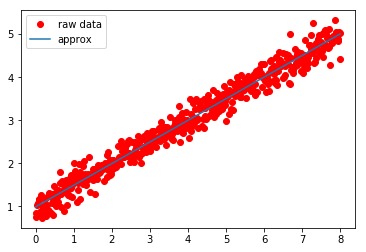

In [4]:
print ('No Noise + MSE')
homework_part1 = task3(true_function=lambda x: 0.5 * x + 1, true_points=500, true_disp=0.2)
homework_part1.proceed(noise=False)

Noise + MSE


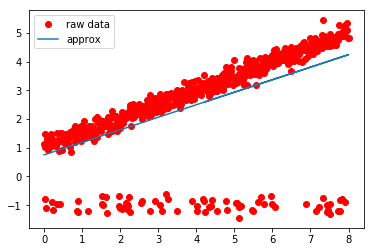

In [5]:
print ('Noise + MSE')
homework_part2 = task3(true_function=lambda x: 0.5 * x + 1, true_points=500, true_disp=0.2,
                       noise_function = lambda x: 0 * x - 1, noise_points=75, noise_disp=0.2)
homework_part2.proceed()

Noise + MAE


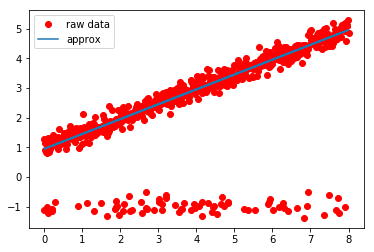

In [6]:
print ('Noise + MAE')
homework_part2 = task3(Q='MAE',
                       true_function=lambda x: 0.5 * x + 1, true_points=500, true_disp=0.2,
                       noise_function = lambda x: 0 * x - 1, noise_points=75, noise_disp=0.2)
homework_part2.proceed()

## Вывод:
среднее модулей отклонений (**MAE**) гораздо более устойчиво к выбросам, чем среднее квадратов отклонений (**MSE**).